## K-Means Clustering using python

### Problem Statement
Customer segmentation using K-Means clustering on Mall Customer Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore the warnings --sometimes not important
import warnings
warnings.filterwarnings('ignore')

### Understanding data

In [2]:
cust = pd.read_csv("C:\Vikram\Datasets\Mall_Customers.csv")
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
cust.duplicated().sum()

0

This suggests that there is neither any missing values nor any duplicate value present in the data.

### **Preparing data for clustering**

K-Mean clustering algorithm uses the quantitative data and use Euclidean measure to find distance between observations. In the given data Age, Annual Income and Spending Score are the numerical variables, but we will conisder only **Annual Income** and **Spending Score** for K-Mean Clustering.

We will use KMean function in Scikit-Learn modeule. It takes only numpy ndarrays from user, so we will convert the choose columns values to numpy ndarray as follows.

In [5]:
X = cust.iloc[:, [3,4]].values
X[0:5, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25050.832307547527,
 21862.09267218289,
 19657.783608703958]

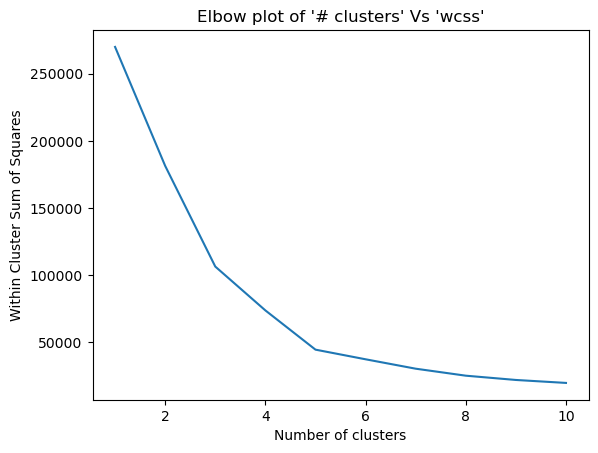

In [8]:
plt.plot(range(1,11), wcss)
plt.title("Elbow plot of '# clusters' Vs 'wcss'")
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

As we can see in the above plot, we can observe elbow at **k=5**. So we consider the optimal number of clusters for customer segmentation is 6.

### Final K-Mean model

In [9]:
kmeansmodel = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)

In [10]:
y_kmeans = kmeansmodel.fit_predict(X)

In [11]:
from collections import Counter

fq = Counter(y_kmeans)
fq

Counter({0: 81, 1: 39, 2: 35, 3: 23, 4: 22})

**This shows that Cluster 1 has highest number of observations (81).**

In [12]:
X[y_kmeans==0,:][0:10,:]

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45]], dtype=int64)

Since we can not visualize the scatter plot of three variable on 2 dimensional graph, we will visualize the clusters on any two columns, lets say on first two columns.

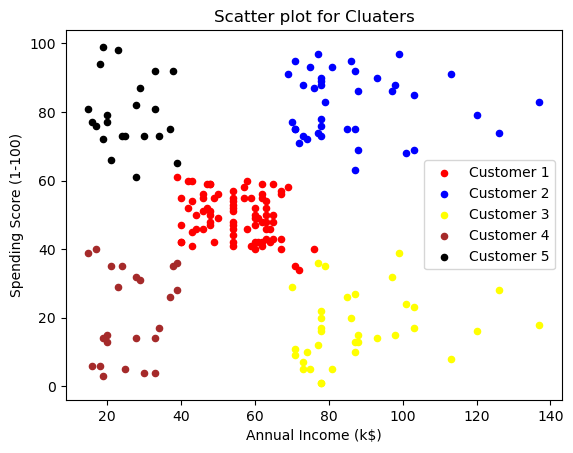

In [13]:
# visualizing the clusters on first two columns
plt.scatter(X[y_kmeans==0, 0],X[y_kmeans==0, 1], s=20, c="red", label="Customer 1")
plt.scatter(X[y_kmeans==1, 0],X[y_kmeans==1, 1], s=20, c="blue", label="Customer 2")
plt.scatter(X[y_kmeans==2, 0],X[y_kmeans==2, 1], s=20, c="yellow", label="Customer 3")
plt.scatter(X[y_kmeans==3, 0],X[y_kmeans==3, 1], s=20, c="brown", label="Customer 4")
plt.scatter(X[y_kmeans==4, 0],X[y_kmeans==4, 1], s=20, c="black", label="Customer 5")
plt.title('Scatter plot for Cluaters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- The Cluster 1 and Cluster 2 have top most number of observations.
- The customers in Cluster 1 are the people with moderately high salary and they are spending moderately large. While customers in Cluster 2 are the the people with highest salary and they are spending high among people in rest of the clusters.

This suggest that the company should focus on focus more on customers in cluster 1 and cluster 2.